<a href="https://colab.research.google.com/github/rhf24/week4/blob/main/RAHAF_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load the Data

In [ ]:
df = pd.read_csv("Traffic_Accidents.csv")
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [ ]:
df.shape

(52000, 26)

In [ ]:
print(df.head())


   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Police_Force  Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
0            47                3.0                   1                   1.0   
1             1                3.0                   2                   1.0   
2            62                3.0                   2                   1.0   
3             4                3.0                   1                   2.0   
4            21                3.0                   2                   2.0   

        Date  Day_of_Week  ...  Weather_Conditions_Fine with high winds  \

In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [ ]:
df.duplicated().sum()

43

In [ ]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
Q1 = df['Number_of_Casualties'].quantile(0.25)
Q3 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Number_of_Casualties'] >= lower_bound) & (df['Number_of_Vehicles'] <= upper_bound)]

print(df_no_outliers)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0

In [ ]:
df['Light_Conditions'] = pd.to_numeric(df['Light_Conditions'], errors='coerce')
df['Urban_or_Rural_Area'] = pd.to_numeric(df['Urban_or_Rural_Area'], errors='coerce')

mean_light_conditions = df['Light_Conditions'].mean()
mean_urban_rural = df['Urban_or_Rural_Area'].mean()


df_filled = df.copy()
df_filled['Light_Conditions'] = df_filled['Light_Conditions'].fillna(mean_light_conditions)
df_filled['Urban_or_Rural_Area'] = df_filled['Urban_or_Rural_Area'].fillna(mean_urban_rural)

print(df_filled)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_cols]

scaler = MinMaxScaler()
df_scaled_numerical = scaler.fit_transform(df_numerical)

df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)

df_scaled = pd.concat([df_scaled_numerical, df.drop(numerical_cols, axis=1)], axis=1)

print(df_scaled)

       Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0                   0.830308                0.071670   0.829304  0.073596   
1                   0.737457                0.141906   0.747459  0.144705   
2                   0.388118                0.126681   0.423616  0.129905   
3                   0.437069                0.328559   0.464044  0.331396   
4                   0.517553                0.279406   0.542525  0.282705   
...                      ...                     ...        ...       ...   
51995               0.676835                0.253488   0.694569  0.256406   
51996               0.643692                0.091173   0.659315  0.094856   
51997               0.794332                0.112434   0.798633  0.114692   
51998               0.604227                0.265827   0.625514  0.269085   
51999               0.640149                0.140437   0.657097  0.143975   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
0          0.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
k = 3

feature_columns = ['Accident_Severity', 'Number_of_Casualties']
X = df_filled[feature_columns].values

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

print(clusters)


{0: {'center': array([0.06919154, 1.78785042]), 'points': []}, 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []}, 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

print("PCA Result:")
print(X_pca)


PCA Result:
[[-0.5832354]
 [-0.5832354]
 [-0.5832354]
 ...
 [-0.5832354]
 [ 0.2519882]
 [-0.5832354]]


In [ ]:
df_encoded = pd.get_dummies(df)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(df_encoded)

Original DataFrame:
       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0                   560530.0                103950.0   0.277298  50.812789   
1                   508860.0                187170.0  -0.430574  51.572846   
2                   314460.0                169130.0  -3.231459  51.414661   
3                   341700.0                408330.0  -2.881800  53.568318   
4                   386488.0                350090.0  -2.203020  53.047882   
...                      ...                     ...        ...        ...   
51995               475125.0                319380.0  -0.888006  52.766777   
51996               456682.0                127058.0  -1.192915  51.040030   
51997               540510.0                152250.0   0.012032  51.252055   
51998               434720.0                334000.0  -1.485264  52.902301   
51999               454710.0                185430.0  -1.212104  51.565050   

       Police_Force  Accident_Severity  Num

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
features = [
    'Weather_Conditions',
    'Number_of_Vehicles',
    'Date'
]

df_selected = df[features]
##features such as Weather_Conditions, Number_of_Vehicles, and Date into clustering analysis is crucial for gaining a nuanced understanding of accident patterns.
##Weather_Conditions significantly impacts the likelihood and severity of accidents,
## as adverse weather can compromise road safety. The Number_of_Vehicles involved in an accident provides insight into its scale and potential impact


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        27/11/2009
1        10/10/2010
2        14/09/2005
3        18/08/2007
4        06/08/2013
            ...    
51995    31/08/2012
51996    08/05/2013
51997    01/11/2011
51998    22/07/2011
51999    24/05/2010
Name: Date, Length: 52000, dtype: object

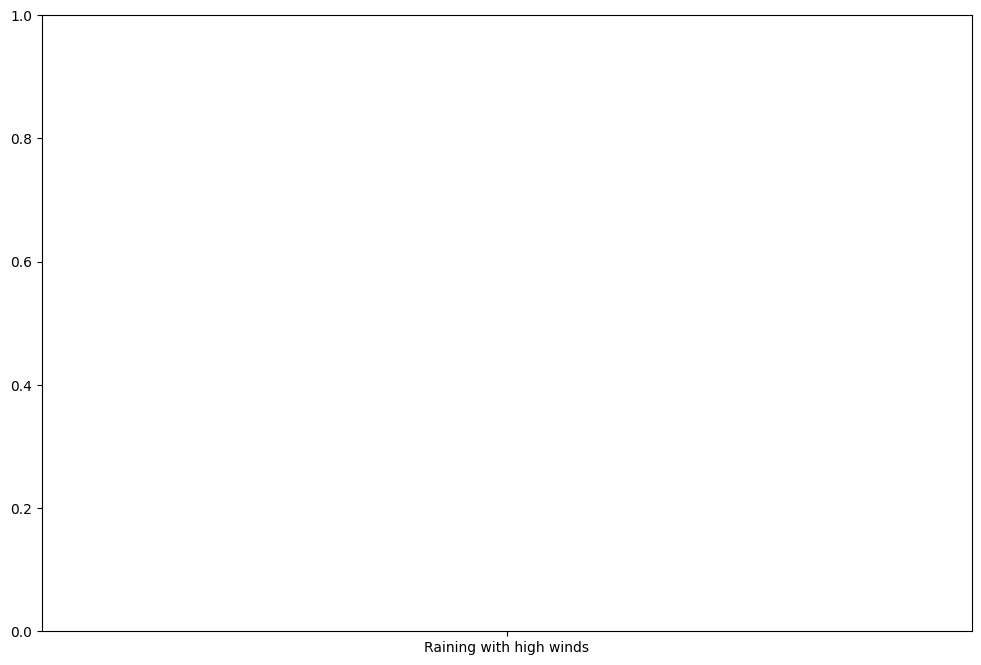

In [ ]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df['Weather_Conditions'], df['Number_of_Vehicles'], c=df['Date'], cmap='viridis', alpha=0.7)

plt.colorbar(scatter, label='Date')
plt.xlabel('Weather_Conditions')
plt.ylabel('Number of Vehicles')
plt.title('Scatter Plot of Number of Vehicles vs. Weather Conditions with Temporal Changes')
plt.grid(True)
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

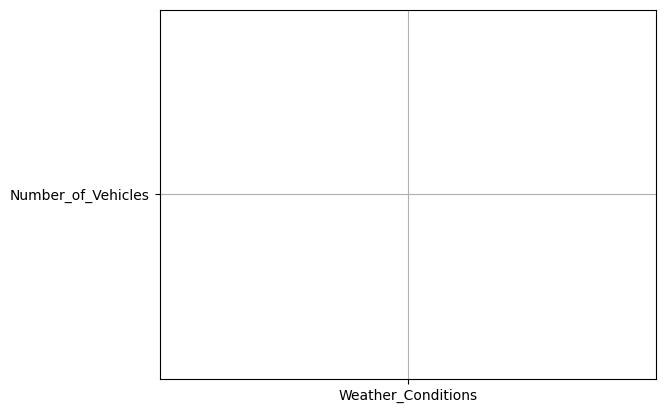

In [ ]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter('Weather_Conditions','Number_of_Vehicles', 'Date')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [ ]:
features = ['Correct_Weather_Conditions', 'Number_of_Vehicles', 'Date']
scaler = StandardScaler()

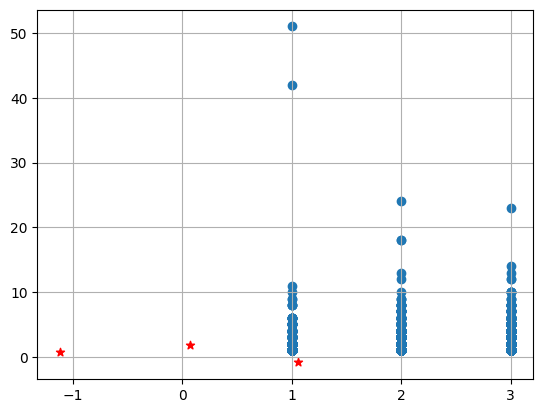

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

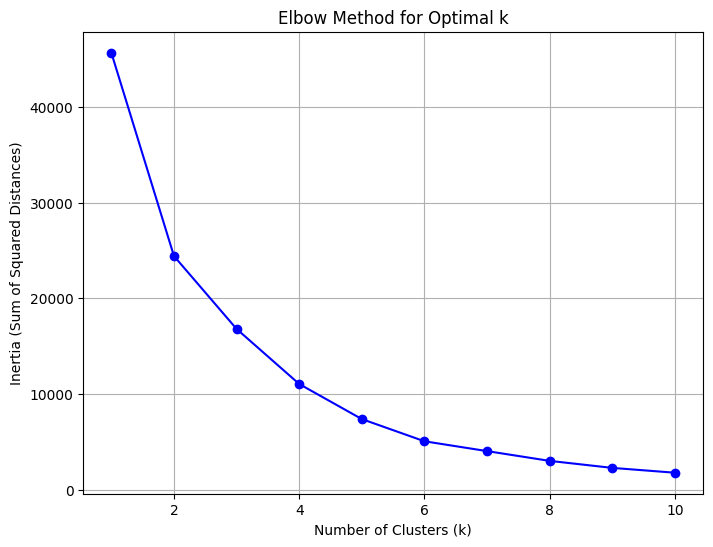

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_imputed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_imputed, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.747


## Plot the data points with their predicted cluster center

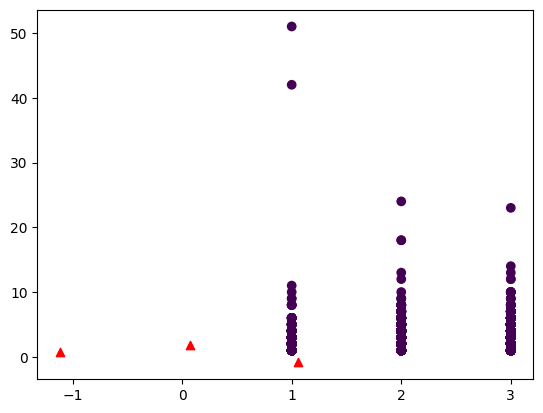

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1- features such as Weather_Conditions, Number_of_Vehicles, and Date into clustering analysis is crucial for gaining a nuanced understanding of accident patterns. Weather_Conditions significantly impacts the likelihood and severity of accidents, as adverse weather can compromise road safety. The Number_of_Vehicles involved in an accident provides insight into its scale and potential impact

2- When I looked at the data I thought it was best 3


3- scatter
It is good at presenting data and comparison.

4- We reduce empty values ​​and delete unimportant features in order to train the model better and more accurately.